New permeability grid:
 [[2 1 2 2 2 1 2 2 2 1]
 [2 0 2 2 1 1 1 1 2 1]
 [1 0 2 2 2 1 2 1 1 1]
 [2 2 1 0 1 1 0 2 2 1]
 [2 1 1 2 1 1 2 1 1 2]
 [2 2 1 2 1 1 1 1 2 2]
 [2 2 1 0 2 2 1 2 2 1]
 [2 2 0 1 2 1 2 2 2 1]
 [2 2 2 1 2 2 2 2 2 2]
 [1 1 0 0 1 2 0 2 1 1]]
The number of times low permeability appeared in the grid is 9 times 
The number of times medium permeability appeared in the grid is 40 times
The number of times high permeability appeared in the grid is 51 times


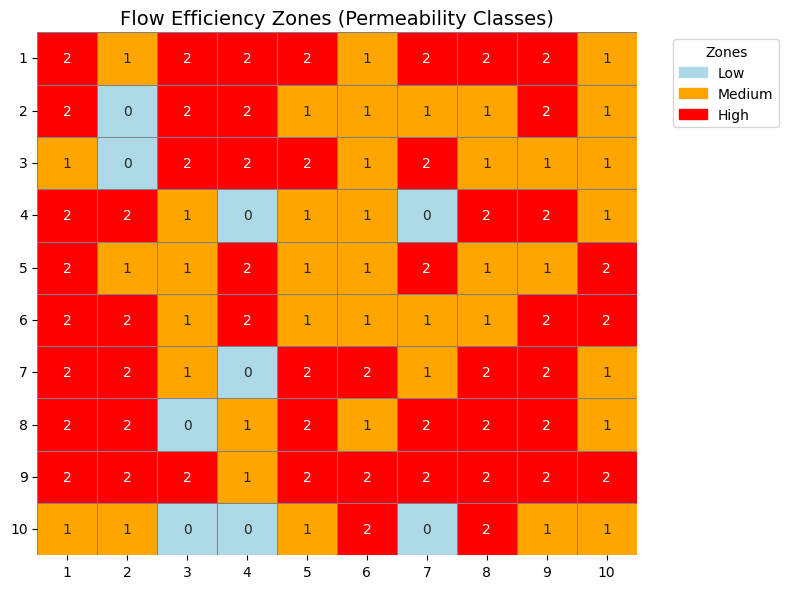

In [1]:
#GOAL: PERMEABILITY MAPPING WITH FLOW EFFICIENCIES ZONES TO DETERMINE THE DIFFERENT PERMEABILITY GRID ZONES IN A RESERVOIR
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#characterization of random pressure values between (10 and 1000 psi) in a 10 by 10 grid
permeability_grid = np.random.uniform(10,1000,(10,10))

#converting the grid to base-10 log because permeability values are typically log distributed
permeability_log_grid = np.log10(permeability_grid)

#classify the zones
classified_log_grid = np.empty_like(permeability_log_grid, dtype=object) #this would allow string assignment, the empty there would create an empty array to insert those new values that are to be assigned 
classified_log_grid[permeability_log_grid < 2] ="Low permeability"
classified_log_grid[(permeability_log_grid <=2) & (permeability_log_grid <= 2.7)] ="Medium permeability"
classified_log_grid[permeability_log_grid > 2.7] ="High permeability"
# print("Classified_log_grid\n",classified_log_grid)

#create a new grid to classify the ranges of the different permeability zones
new_permeability_grid = np.zeros_like(permeability_log_grid, dtype=int)
new_permeability_grid[(permeability_log_grid >=2) & (permeability_log_grid <2.7)] = 1
new_permeability_grid[permeability_log_grid >=2.7] = 2
print("New permeability grid:\n",new_permeability_grid)

#counting how many grids fall into each zone
Low_permeability = np.sum(new_permeability_grid ==0)
print(f"The number of times low permeability appeared in the grid is {Low_permeability} times ")

medium_permeability = np.sum(new_permeability_grid ==1)
print(f"The number of times medium permeability appeared in the grid is {medium_permeability} times")

high_permeability = np.sum(new_permeability_grid ==2)
print(f"The number of times high permeability appeared in the grid is {high_permeability} times")

#VISUALISATION
# Set up a color map for the integer-based zone map
zone_labels = ["Low", "Medium", "High"]
cmap = sns.color_palette(["lightblue", "orange", "red"])

plt.figure(figsize=(8, 6))
sns.heatmap(new_permeability_grid, annot=True, fmt="d", cmap=cmap, cbar=False, linewidths=0.5, linecolor="gray")

# Add tick labels
plt.xticks(ticks=np.arange(10) + 0.5, labels=np.arange(1, 11))
plt.yticks(ticks=np.arange(10) + 0.5, labels=np.arange(1, 11), rotation=0)

# Title and legend
plt.title("Flow Efficiency Zones (Permeability Classes)", fontsize=14)
handles = [plt.Rectangle((0, 0), 1, 1, color=c) for c in cmap]
plt.legend(handles, zone_labels, title="Zones", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()



